## Zadanie domowe: morfologiczna gra w życie – John Conway

### Wykorzystanie operacji LUT w przekształceniu trafi, nie trafi
  - Szybszą metodą wykonania transformacji trafi, nie trafi może być operacja LUT.
  - Technika polega na zakodowaniu wyników wszystkich interesujących  konfiguracji, a następnie podczas przetwarzania wykorzystania operacji LUT.
  - Dla otoczenia 3x3 możliwe jest 512 różnych konfiguracji.
  - Aby praktycznie zrealizować operacje, każdej konfiguracji należy nadać unikalny indeks. Jedną z możliwości jest pomnożenie elementu strukturalnego przez macierz (mnożenie odpowiednich elementów):
  ```
  [[1, 8,  64],
   [ 2, 16, 128],
   [ 4, 32, 256]]
  ```
  Przykładowo elementowi:
  ```
  [[1, 1, 0],
   [ 1, 0, 1],
   [ 1, 0, 1]]
  ```
  odpowiada liczba: 1(1) + 2(1) + 4(1) + 8(1) + 128(1) + 256(1) = 399.
  
### Przykład działania metody – detekcja punktów końcowych na obrazie.
  - założenie: punkt końcowy to punkt, który ma dokładnie jednego sąsiada,
  - zdefiniuj funkcję, która jako argument pobiera otoczenie, a zwraca 0 lub 1 w zależności od tego, czy rozpatrywany punkt jest końcowy np. dla sąsiedztwa 3×3 punkt będzie końcowy, jeżeli jest zapalony i ma tylko jednego sąsiada (czyli suma pikseli jest równa 2).
  - wygeneruj przekodowanie LUT.
  - wczytaj obraz szkielet.bmp (należy go przekształcić, aby uzyskać dwuwymiarową tablicę o wartościach 0-1). Wykorzystując wygenerowane przekodowanie LUT wykonaj detekcję zakończeń. Wyświetl obraz oryginalny i po przekodowaniu LUT.

### Gra w życie

Reguły gry w życie:
  - każdy piksel biały, który ma dwóch lub trzech sąsiadów (białych) przeżywa,
  - każdy piksel biały, który ma 0,1 lub więcej niż trzech sąsiadów (białych) nie przeżywa (głód lub przeludnienie),
  - jeżeli jakieś pole (czarne) sąsiaduje dokładnie z trzema pikselami białymi, to na tym polu ,,rodzi'' się nowy piksel biały.

Zadanie:
  - za pomocą mechanizmu LUT (opisanego wcześniej) należy zaimplementować morfologiczną gre w życie,
  - najważniejszym elementem jest funkcja opisująca reguły gry,
  - symulacje należny przeprowadzić dla plansz dostarczonych w pliku gra.py,
  - dobrze jest wykonać kilka iteracji – zobaczyć jak zmienia się kształt,
  - inne ciekawe kształty do znalezienia w internecie.


In [66]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

In [67]:
def count_bits(n):
    count = 0
    while n:
        n = n & (n - 1)
        count += 1
    return count

lut = np.zeros(512)
for i in range(0b1000000000):
    if i & 0b10000:
        if count_bits(i) == 2:
            lut[i] = 1
    else:
        lut[i] = 0

def lut_check(surrounding):
    matrix = np.array([[1,8,64], [2,16,128], [4,32,256]])
    surrounding = surrounding / 255
    surrounding = surrounding.astype(bool)

    pixel = np.sum(matrix, where=surrounding)

    return lut[int(pixel)]

def end_points(image):
    x,y = I_szkielet.shape
    result = np.zeros((x, y))

    for i in range(1, x-1):
        for j in range(1, y-1):
            oto = image[i-1:i+2, j-1:j+2]
            piksel = lut_check(oto)
            result[i, j] = piksel

    return result


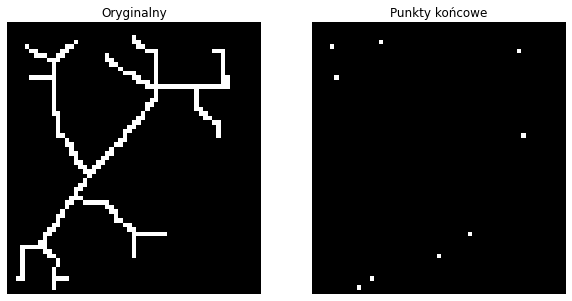

In [68]:
I_szkielet = cv2.imread('szkielet.bmp', cv2.IMREAD_GRAYSCALE)

f, axs = plt.subplots(1,2, figsize=(10, 5))
f.set_size_inches(10,5)
axs[0].imshow(I_szkielet, 'gray')
axs[0].axis('off')
axs[0].set_title('Oryginalny')
axs[1].imshow(end_points(I_szkielet), 'gray')
axs[1].axis('off')
axs[1].set_title('Punkty końcowe')
plt.show()

In [69]:
lut_game = np.zeros(512)
for i in range(512):
  if i & 0b10000:
    if count_bits(i) == 3 or count_bits(i) == 4:
      lut_game[i] = 1

  elif count_bits(i) == 3:
    lut_game[i] = 1

def is_point_alive(surrounding, recode):
    matrix = np.array([[1,8,64], [2,16,128], [4,32,256]])
    surrounding = surrounding.astype(bool)
    pixel = np.sum(matrix, where=surrounding)

    return recode[int(pixel)]

In [70]:
plansza1 = np.array([
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	1,	0,	0,	1,	0,	0,	0],
    [0,	0,	0,	1,	1,	1,	1,	0,	0,	0],
    [0,	0,	1,	0,	0,	0,	0,	1,	0,	0],
    [0,	0,	1,	0,	1,	1,	0,	1,	0,	0],
    [0,	0,	1,	0,	0,	0,	0,	1,	0,	0],
    [0,	0,	0,	1,	1,	1,	1,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0]], np.uint8)

plansza2 = np.array([
    [0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1],
    [0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1],
    [1,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0]], np.uint8)

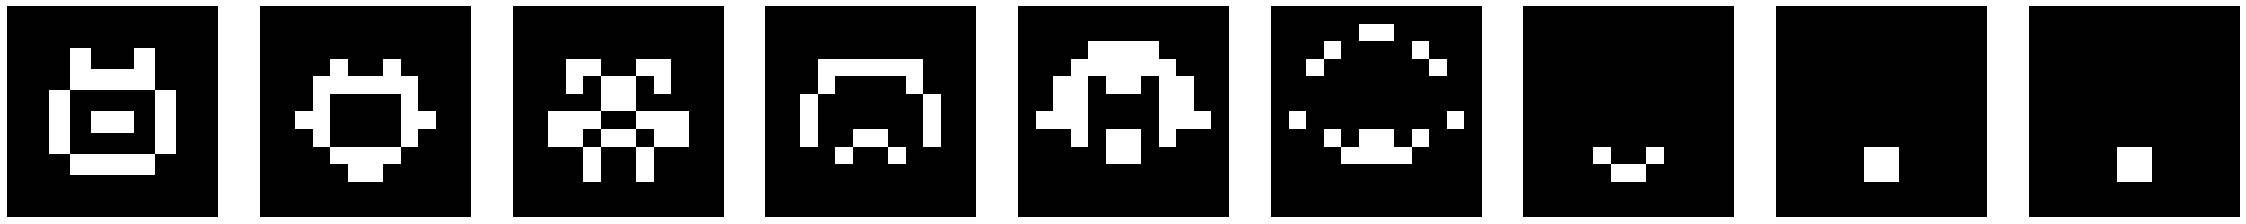

In [81]:
iteration = 8
x, y = plansza1.shape
field = np.zeros((x+2, y+2))
field[1:-1,1:-1] = plansza1
new_field = field.copy()

figure, axis = plt.subplots(1, iteration + 1, figsize=(5*iteration, 5))
axis[0].imshow(plansza1, 'gray')
axis[0].axis('off')

for iteration in range(iteration):
    new = np.zeros((x, y))

    for i in range(1, x + 1):
        for j in range(1, y + 1):
            surrounding = field[i-1:i+2, j-1:j+2]
            pixel = is_point_alive(surrounding, lut_game)
            new_field[i, j] = pixel

    axis[iteration + 1].imshow(new_field, 'gray')
    axis[iteration + 1].axis('off')
    field = new_field.copy()

plt.show()


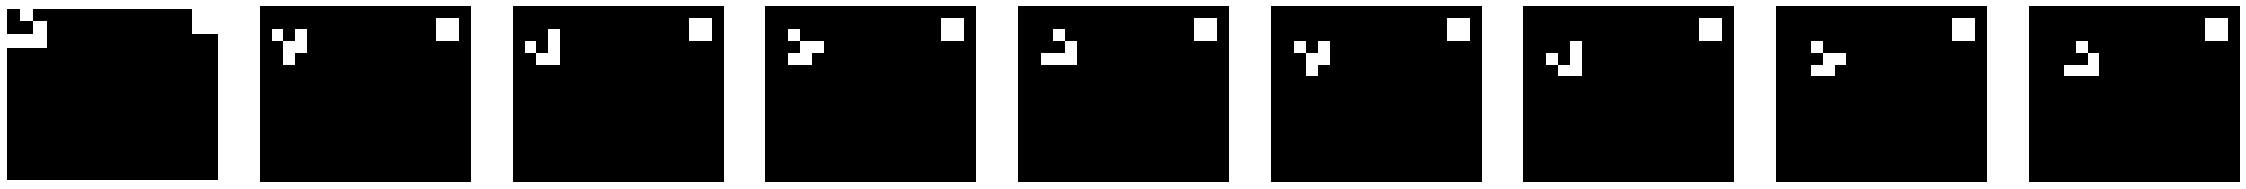

In [84]:
iteration = 8
x, y = plansza2.shape
field = np.zeros((x+2, y+2))
field[1:-1,1:-1] = plansza2
new_field = field.copy()

figure, axis = plt.subplots(1, iteration + 1, figsize=(5*iteration, 5))
axis[0].imshow(plansza2, 'gray')
axis[0].axis('off')

for iteration in range(iteration):
    new = np.zeros((x, y))

    for i in range(1, x + 1):
        for j in range(1, y + 1):
            surrounding = field[i-1:i+2, j-1:j+2]
            pixel = is_point_alive(surrounding, lut_game)
            new_field[i, j] = pixel

    axis[iteration + 1].imshow(new_field, 'gray')
    axis[iteration + 1].axis('off')
    field = new_field.copy()

plt.show()